In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
from PIL import Image as image
import random
import math
from skimage import io
from skimage.transform import rescale, resize
import cv2
import os as os

9967
(128, 128, 3)


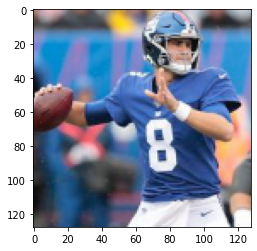

In [12]:
image_path = "/content/drive/MyDrive/Colab Notebooks/dataset/dj_picture.jpg"
img = io.imread(image_path)
print(os.stat(image_path).st_size)
image_rescaled = rescale(img, 128/img.shape[0], multichannel=True)
print(image_rescaled.shape)
plt.imshow(image_rescaled)
plt.show()

In [13]:
def read_image(image_path):
  img = io.imread(image_path)
  return img
def process_image(image_path):
  image_rescaled = read_image(image_path)
  image_rescaled = image_rescaled/255.0
  return image_rescaled

In [14]:
def initialize_mean(img, clusters=16):

  #flatten image
  flatten_img = np.reshape(img,(img.shape[0] * img.shape[1],img.shape[2]))
  x, y = flatten_img.shape

  #centroids
  centroids = np.zeros((clusters, y))

  random.seed(5)
  # create random points for centroids
  for i in range(clusters):
    random1, random2 = int(random.random()), int(random.random())
    centroids[i][0] = flatten_img[random1][0]
    centroids[i][1] = flatten_img[random2][1]
    centroids[i][2] = flatten_img[random2][1] #makes image look better by giving it a b value
  return centroids, flatten_img

In [15]:
def distance(x1, y1, x2, y2):
  return math.sqrt(((x1 - x2) ** 2) + ((y1 - y2) ** 2))

In [16]:
def create_dictionary(clusters=16):
  dict = {}
  for i in range(clusters):
    dict[i] = np.array([(None, None)])
  return dict


In [17]:
def k_means(flatten_img, centroids, clusters=16, iterations=10):
  while iterations > 0:
    clustered_points = create_dictionary(clusters)
    x, y = flatten_img.shape
    index = np.zeros(x)
    for i in range(x):
      minDistance = math.inf
      closestCentroid = -1 # might have no purpose
      x1 = flatten_img[i][0]
      y1 = flatten_img[i][1]
      for j in range(clusters):
        x2 = centroids[j][0]
        y2 = centroids[j][1]
        tempDistance = distance(x1, y1, x2, y2)
        if tempDistance < minDistance:
          minDistance = tempDistance
          index[i] = j
          closestCentroid = j
      clustered_points[closestCentroid] = np.vstack((clustered_points[closestCentroid], (x1,y1)))
    for j in clustered_points:
      clustered_points[j] = clustered_points[j][1:]
      count = len(clustered_points[j])
      if count != 0:
        sum = np.sum(clustered_points[j], axis=0)
      else:
        continue
      centroids[j][0] = sum[0]/count
      centroids[j][1] = sum[1]/count
      #centroids[j][2] = sum[0]/count
    iterations -=1
  return centroids, index
  
    

In [18]:
def compress_image(centroids, index, img):
    recovered = centroids[index.astype(int), :]
    recovered = np.reshape(recovered, (img.shape[0], img.shape[1],img.shape[2]))
    plt.imshow(recovered)
    io.imsave('recovered.png', recovered)
    plt.show()
    

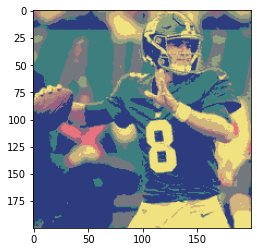

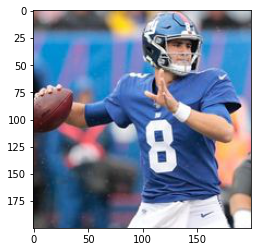

In [19]:
img = process_image(image_path)
centroids, flatten_img = initialize_mean(img)
centroids, index = k_means(flatten_img, centroids)
compress_image(centroids, index, img)
original_image = read_image(image_path)
plt.imshow(original_image)
plt.show()


In [20]:
image_path = "/content/recovered.png"
img = io.imread(image_path)
print(os.stat(image_path).st_size)

11040
